# Orthogonal polynomials

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

## Mini-Introduction to `sympy`

In [2]:
import sympy as sym

# Enable "pretty-printing" in IPython
sym.init_printing()

/usr/lib/python3/dist-packages/sympy/core/function.py:105: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  evalargspec = inspect.getargspec(cls.eval)


Make a new `Symbol` and work with it:

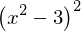

In [3]:
x = sym.Symbol("x")

myexpr = (x**2-3)**2
myexpr

In [4]:
myexpr = (x**2-3)**2
myexpr
myexpr.expand()

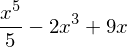

In [5]:
sym.integrate(myexpr, x)

In [6]:
sym.integrate(myexpr, (x, -1, 1))

## Orthogonal polynomials

Now write a function `inner_product(f, g)`:

In [7]:
def inner_product(f, g):
    return sym.integrate(f*g, (x, -1, 1))

Show that it works:

In [8]:
inner_product(1, 1)

In [9]:
inner_product(1, x)

Next, define a `basis` consisting of a few monomials:

In [10]:
basis = [1, x, x**2, x**3]
#basis = [1, x, x**2, x**3, x**4, x**5]

And run Gram-Schmidt on it:

In [11]:
orth_basis = []

for q in basis:
    for prev_q in orth_basis:
        q = q - inner_product(prev_q, q)*prev_q
    q = q / sym.sqrt(inner_product(q, q))
    
    orth_basis.append(q)

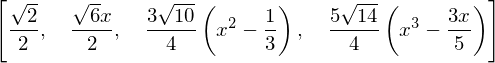

In [12]:
orth_basis

These are called the *Legendre polynomials*.

--------------------
What do they look like?

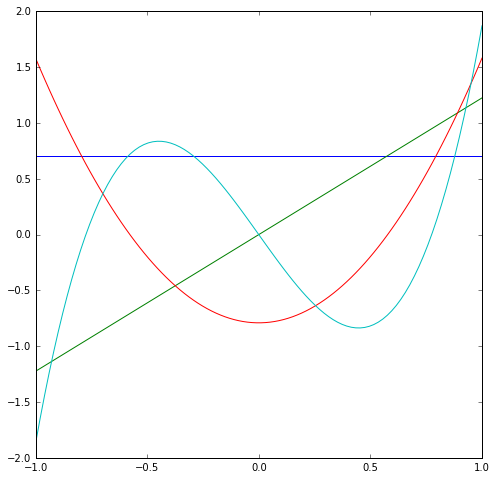

In [13]:
mesh = np.linspace(-1, 1, 100)

pt.figure(figsize=(8,8))
for f in orth_basis:
    f = sym.lambdify(x, f)
    pt.plot(mesh, [f(xi) for xi in mesh])

-----
These functions are important enough to be included in `scipy.special` as `eval_legendre`:

**!!** Careful: The Scipy versions do not have norm 1.


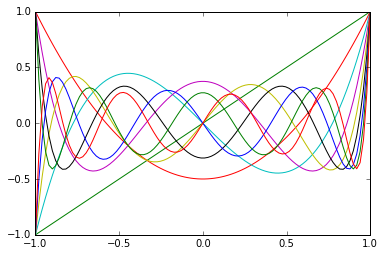

In [15]:
import scipy.special as sps

for i in range(10):
    pt.plot(mesh, sps.eval_legendre(i, mesh))

What can we find out about the conditioning of the generalized Vandermonde matrix for Legendre polynomials?

In [15]:
#keep
n = 20
xs = np.linspace(-1, 1, n)
V = np.array([
    sps.eval_legendre(i, xs)
    for i in range(n)
]).T

la.cond(V)